# Importando bibliotecas

In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.dummy import DummyClassifier

sns.set_theme()

# Aquisição dos dados

link:https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv

In [142]:
url = 'https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv'

In [143]:
diabetes = pd.read_csv(url)

diabetes.head(10)

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo
5,5,116,74,0,0,25.6,0.201,30,testado_negativo
6,3,78,50,32,88,31.0,0.248,26,testado_positivo
7,10,115,0,0,0,35.3,0.134,29,testado_negativo
8,2,197,70,45,543,30.5,0.158,53,testado_positivo
9,8,125,96,0,0,0.0,0.232,54,testado_positivo


In [144]:
diabetes['resultado'] = diabetes['resultado'].map({'testado_positivo': 'Positivo', 'testado_negativo': 'Negativo'})

diabetes.head(10)

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,Positivo
1,1,85,66,29,0,26.6,0.351,31,Negativo
2,8,183,64,0,0,23.3,0.672,32,Positivo
3,1,89,66,23,94,28.1,0.167,21,Negativo
4,0,137,40,35,168,43.1,2.288,33,Positivo
5,5,116,74,0,0,25.6,0.201,30,Negativo
6,3,78,50,32,88,31.0,0.248,26,Positivo
7,10,115,0,0,0,35.3,0.134,29,Negativo
8,2,197,70,45,543,30.5,0.158,53,Positivo
9,8,125,96,0,0,0.0,0.232,54,Positivo


## Descrição das colunas

In [145]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quantidade_gravidez   768 non-null    int64  
 1   concentracao_glicose  768 non-null    int64  
 2   pressao               768 non-null    int64  
 3   espessura_triceps     768 non-null    int64  
 4   insulina              768 non-null    int64  
 5   imc                   768 non-null    float64
 6   diabetes_pedigree     768 non-null    float64
 7   idade                 768 non-null    int64  
 8   resultado             768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


- `quantidade_gravidez` : Número de vezes que engravidou
- `concentracao_glicose` : Concentração de glicose
- `pressao`: Pressão arterial diastólica (mm Hg)
- `espessura_triceps` : Espessura da dobra cutânea do tríceps (mm)
- `insulina` : Insulina (muU/ml)
- `imc` : Índice de Massa Corporal
- `diabetes_pedigree` : Função hereditária do diabetes
- `idade` : Idade (anos)
- `resultado` : Resultado

# Análise exploratória

## Análise inicial dos valores

In [146]:
diabetes.describe()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Analisando proporção entre resultados para diabetes

In [147]:
proporcao = diabetes['resultado'].value_counts(normalize=True)

proporcao

Negativo    0.651042
Positivo    0.348958
Name: resultado, dtype: float64

In [148]:
proporcao = np.array(proporcao) * 100

proporcao

array([65.10416667, 34.89583333])

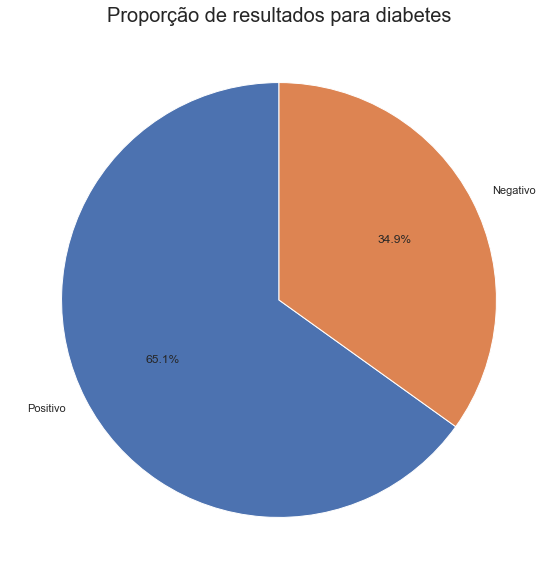

In [149]:
labels = ['Positivo', 'Negativo']

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Proporção de resultados para diabetes', fontsize=20)
ax.pie(proporcao, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

## Número de vezes que engravidou vs resultado para diabetes

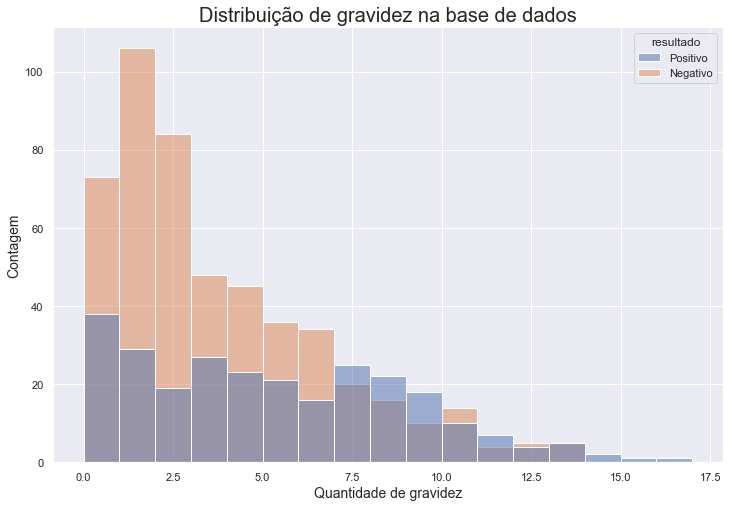

In [150]:
plt.figure(figsize=(12, 8))

sns.histplot(diabetes, x='quantidade_gravidez', bins=len(diabetes['quantidade_gravidez'].value_counts()), hue='resultado')

plt.title('Distribuição de gravidez na base de dados', fontsize=20)
plt.ylabel('Contagem', fontsize=14)
plt.xlabel('Quantidade de gravidez', fontsize=14)
plt.show()

Pelo gráfico, a quantidade de vezes que engravidou parece não afetar no resultado para diabetes.

## Concentração de glicose vs resultado para diabetes

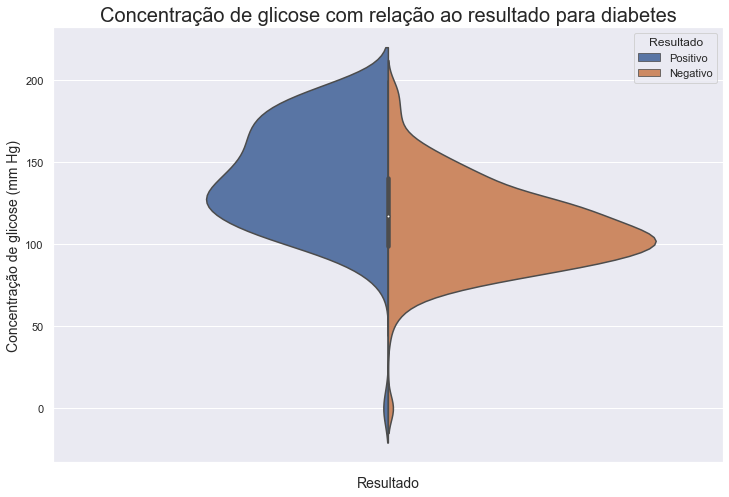

In [151]:
aux_df = diabetes[['concentracao_glicose', 'resultado']].copy()
aux_df['aux'] = ""

plt.figure(figsize=(12, 8))

ax = sns.violinplot(x='aux', y='concentracao_glicose', data=aux_df, hue='resultado', split=True)

plt.title('Concentração de glicose com relação ao resultado para diabetes', fontsize=20)
plt.legend(title='Resultado')
plt.ylabel('Concentração de glicose (mm Hg)', fontsize=14)
plt.xlabel('Resultado', fontsize=14)
plt.show()

Como é possível perceber graças ao gráfico, pessoas com diabetes tendem a ter uma maior concentração de glicose.

## IMC vs resultado para diabetes

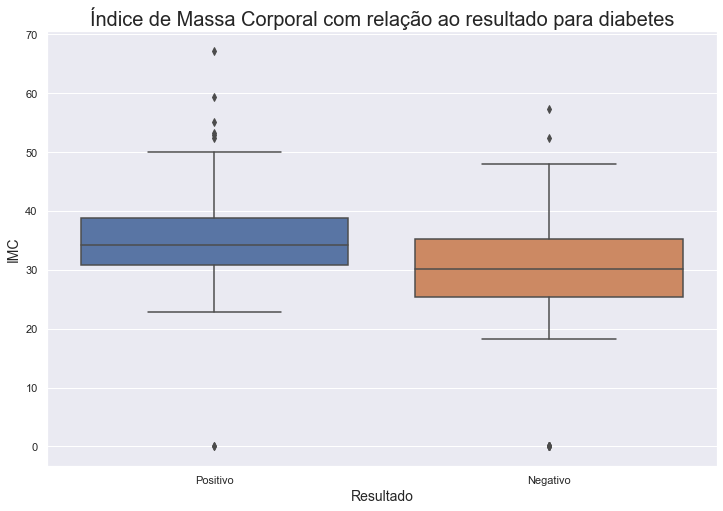

In [152]:
plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=diabetes, x='resultado', y='imc')

plt.title('Índice de Massa Corporal com relação ao resultado para diabetes', fontsize=20)
plt.ylabel('IMC', fontsize=14)
plt.xlabel('Resultado', fontsize=14)
plt.show()

Por mais que apresente pouca diferença, é notável que os que apresentaram resultao positivo para diabetes possuem um IMC maior.

# Criando modelo para classificação

## Particionando em conjuntos x e y

In [153]:
x = diabetes.drop('resultado', axis=1)

x.head(10)

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [154]:
y = diabetes['resultado']

y.head(10)

0    Positivo
1    Negativo
2    Positivo
3    Negativo
4    Positivo
5    Negativo
6    Positivo
7    Negativo
8    Positivo
9    Positivo
Name: resultado, dtype: object

## Particionado os conjuntos x e y em treino e teste

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [156]:
SEED = 73
clf_tree = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [157]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=73)

In [158]:
print('Porcentagem de acerto: {:.2f}%'.format(clf_tree.score(x_test, y_test) * 100))

Porcentagem de acerto: 69.27%


Comparando com um modelo **dummy**

In [159]:
clf_dummy = DummyClassifier(strategy='most_frequent')

In [160]:
clf_dummy.fit(x_train, y_train)

DummyClassifier(strategy='most_frequent')

In [161]:
print('Porcentagem de acerto: {:.2f}%'.format(clf_dummy.score(x_test, y_test) * 100))

Porcentagem de acerto: 62.50%


Nosso modelo de **DecisionTree** alcançou o melhor desempenho que o modelo **Dummy**

# Plotando árvore de decisão

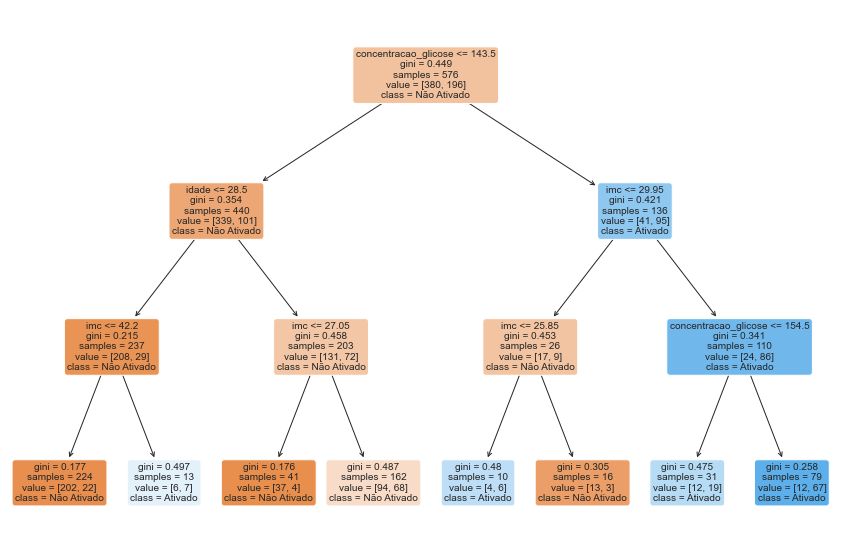

In [162]:
fig, ax = plt.subplots(figsize=(15, 10))

tree.plot_tree(
    clf_tree,
    fontsize=10,
    rounded=True,
    filled=True,
    feature_names=x_train.columns,
    class_names=['Não Ativado', 'Ativado']
);